## Importing Libraries

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Setting up Directories

In [3]:
data_dir = '/Users/mayankbhardwaj/Documents/Coding/Python/Projects/Lung Disease/chest_xray'

In [4]:
os.listdir(data_dir)

['.DS_Store', 'test', 'chest_xray', '__MACOSX', 'train', 'val']

In [5]:
train_path = data_dir+'/train'

In [6]:
test_path = data_dir+'/test'

In [7]:
os.listdir(train_path)

['PNEUMONIA', 'NORMAL']

In [8]:
len(os.listdir(train_path+'/PNEUMONIA'))

3875

## Visualizing a single X-Ray

In [9]:
os.listdir(train_path+'/PNEUMONIA')[145]

'person1424_bacteria_3651.jpeg'

In [10]:
sample_pneumonia_xray = train_path+'/PNEUMONIA/'+'person1424_bacteria_3651.jpeg'

In [11]:
from matplotlib.image import imread

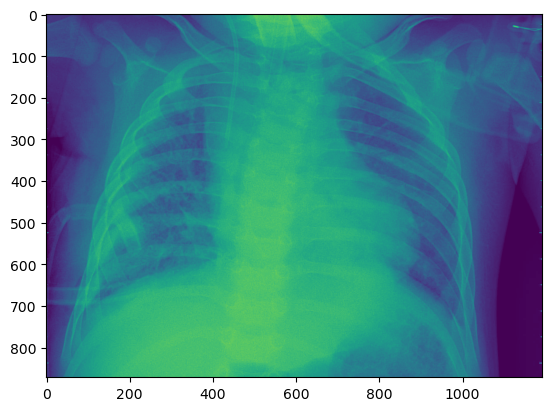

In [12]:
plt.imshow(imread(sample_pneumonia_xray))

## Average size of image

In [13]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/PNEUMONIA/'):
    if image_filename.endswith('.png') or image_filename.endswith('.jpeg'): 
        img = imread(train_path+'/PNEUMONIA/'+image_filename)
        if len(img.shape) == 3:  # Colored image
            d1, d2, _ = img.shape
        else:  # Grayscale image
            d1, d2 = img.shape
        dim1.append(d1)
        dim2.append(d2)


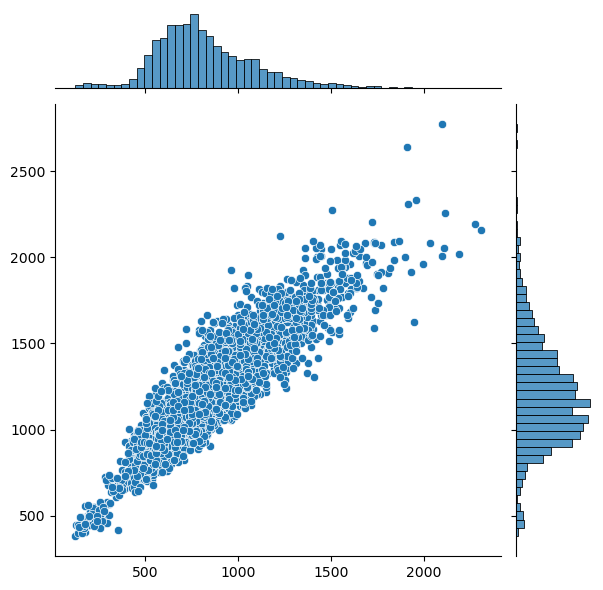

In [14]:
sns.jointplot(x=dim1,y=dim2)

In [15]:
np.mean(dim1)

825.0268387096775

In [16]:
np.mean(dim2)

1200.4836129032258

In [17]:
image_shape = (825,1200,1)

### Generator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, 
                               width_shift_range=0.1,  
                               height_shift_range=0.1,  
                               zoom_range=0.1, 
                               fill_mode='nearest') 

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [25]:
batch_size = 16

In [26]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                batch_size=batch_size,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                                class_mode='binary')

Found 5216 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                batch_size=batch_size,
                                                target_size=image_shape[:2],
                                               color_mode='grayscale',
                                                class_mode='binary',shuffle=False)

Found 624 images belonging to 2 classes.


In [ ]:
model.fit(train_image_gen, epochs=12,validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/12


2023-10-12 05:22:53.279266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-12 05:22:53.282859: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


326/326 [==============================] - ETA: 0s - loss: 0.5954 - accuracy: 0.8273

2023-10-12 06:02:30.500231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


326/326 [==============================] - 2425s 7s/step - loss: 0.5954 - accuracy: 0.8273 - val_loss: 0.6888 - val_accuracy: 0.7292
Epoch 2/12
326/326 [==============================] - 2641s 8s/step - loss: 0.3492 - accuracy: 0.8669 - val_loss: 0.6124 - val_accuracy: 0.7452
Epoch 3/12
326/326 [==============================] - 3896s 12s/step - loss: 0.2871 - accuracy: 0.8821 - val_loss: 0.8123 - val_accuracy: 0.7420
Epoch 4/12
 66/326 [=====>........................] - ETA: 41:33 - loss: 0.2506 - accuracy: 0.8996